###**Evaluating Models**

In the previous session, we learnt how to build machine learning models using a single regressor algorithm and multiple regressor algorithms. We were able to use the models for prediction, we also compared the performance of the models using a table, but one thing we did not do was to test if our trained algortihm did well of the y_test or not.

That is what we will be focusing on, in this session that is, how to evaluate a regressor model and a classifier model.

####**1. Testing A Regressor Model**

For reiteration, the idea behinnd splitting the dataset is to help us test the performance of our built model. The test set help us to see how well our model is predicting on new data or the data that it was not exposed to during its training process.

The proccess of testing your model is called Model Evaluation. The idea behind this evaluation is just to check the difference between what the model has predicted and the actual value. So we are checking for how close what is predicted is to the actual value.

For reggressor models, below are some of the techniques used for evaluating models and how they used.

######**. Mean Square Error (MSE)**

MSE = (1/n) * Σ(actual_y – predicted_y)^2

where:

**Σ** is used to denote the “sum” for all the calculated differences.

**n** is the total number of your data.

**1/n** this takes the average of the calculated squared difference.

**actual_y** is the actual data value you are predicting(target/ dependent variables)

**predicted_y** is the value that your model has predicted.

**^2** denotes the square for each difference calculated.




In [ ]:
import pandas as pd


# LEts load up our our prediction table
results = pd.read_csv("https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/df_results.csv")

In [ ]:
results.head()

,Actual(y),Predicted(y),Difference
0,1.61000,2.259910,0.649910
1,5.00001,4.621255,0.378755
2,3.96400,3.320540,0.643460
3,1.18100,1.873280,0.692280
4,0.93400,1.194990,0.260990


In [ ]:
print(f'Minimum value for Actual(y): {results["Actual(y)"].min()}')
print(f'Maximum value for Actual(y): {results["Actual(y)"].max()}')
print(f'Minimum value for Predicted(y): {results["Predicted(y)"].min()}')
print(f'Maximum value for Predicted(y): {results["Predicted(y)"].max()}')

Minimum value for Actual(y): 0.325
Maximum value for Actual(y): 5.00001
Minimum value for Predicted(y): 0.4809700000000003
Maximum value for Predicted(y): 5.000009999999989


In [ ]:
# Lets import the mean squared error from scikit learn
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
MSE = mean_squared_error(results["Actual(y)"], results["Predicted(y)"])
print(f"Mean Squared Error: {round(MSE, 3)}")

Mean Squared Error: 0.243


The model did a good job of predicting California median house value, as its predictions are relatively close to the true values, even when considering the range of house prices from the lowest at 32,500 dollars to the highest at 500,001 dollars.

A low average error (MSE of 0.243) relative to this broad range of house prices in the data.
The model's predictions also falling within a similar range, indicating it captures both lower and higher-end properties effectively.

But interestingly, this yardstick is not enough to make conclusions. Hence, we would check out other metrics.

######**. Root Mean Square Error (RMSE)**

The root mean square error is more interpretable, as its value is in the same unit as our target variable. It seems more intuitive.

So to get a measure of error in the original units (dollars), you would need to take the square root of the MSE, which gives you the Root Mean Squared Error (RMSE). The RMSE represents the average difference between predicted and actual values in the original units of the target variable (dollars in this case).
Even the RMSE should be interpreted in the context of the specific problem and data. While it provides an error estimate in dollars, it's still an average error and may not reflect the error for individual predictions.

The formula for RMSE

```c
RSME = sqrt(MSE)
```

In [ ]:
# Calculating RMSE manually
import numpy as np

RMSE = np.sqrt(MSE)
print(f"Root Mean Squared Error: {round(RMSE, 3)}")

Root Mean Squared Error: 0.493


In [ ]:
# Calculating RMSE using sklearn
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(results["Actual(y)"], results["Predicted(y)"]))
print(f"Root Mean Squared Error: {round(RMSE, 3)}")

Root Mean Squared Error: 0.493


Lets interprete our RMSE in the context of out data.
when this model makes a prediction for the median house value, there's a chance it won't be perfectly accurate. The RMSE telling us that, on average, the prediction will be off by about $49,300 in either direction.

For example,
let's say our model predicts the median house value for a specific area to be 500,000 dollars.Given that we have an RMSE of 49,300 dollars, we can expect the actual median house value to be somewhere between 450,700 dollars and 549,300 dollars.
The RMSE provides a measure of the average prediction error, not the average median value itself. It helps us understand how much our predictions are likely to deviate from the true values, on average.

In [ ]:
# As a Real estate business owner, lets use the RMSE to range our median house value
# So we would convert the predicted y to dollars, then add the RMSE in dollars to get the highest price the n substract it to get the lowest price
# Then have then sid by side with the actual median value

In [ ]:
results['Predicted(y)'] = results['Predicted(y)'] * 100000  # Convert to dollars
results['Actual(y)'] = results['Actual(y)'] * 100000       # Convert to dollars

# Recalculating RMSE in dollars
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(results["Actual(y)"], results["Predicted(y)"]))


results['Highest_value'] = results['Predicted(y)'] + rmse
results['Lowest_value'] = results['Predicted(y)'] - rmse

pd.options.display.float_format = '{:.2f}'.format
offer_valu_range = results[['Predicted(y)', 'Highest_value', 'Lowest_value', 'Actual(y)']]
offer_valu_range.head()

,Predicted(y),Highest_value,Lowest_value,Actual(y)
0,225991.00,275267.25,176714.75,161000.00
1,462125.55,511401.80,412849.30,500001.00
2,332054.02,381330.27,282777.77,396400.00
3,187328.00,236604.25,138051.75,118100.00
4,119499.01,168775.26,70222.76,93400.00


In [ ]:
# LEts define a conditional filter that tells yes or no if actual value is within the highest and lowest value
results['Within Range'] = (results['Actual(y)'] >= results['Lowest_value']) & (results['Actual(y)'] <= results['Highest_value'])
results['Within Range'] = results['Within Range'].map({True: 'Yes', False: 'No'})
offer_value_range =results[['Predicted(y)', 'Highest_value', 'Lowest_value', 'Actual(y)', 'Within Range']]
offer_value_range.head(10)

,Predicted(y),Highest_value,Lowest_value,Actual(y),Within Range
0,225991.00,275267.25,176714.75,161000.00,No
1,462125.55,511401.80,412849.30,500001.00,Yes
2,332054.02,381330.27,282777.77,396400.00,No
3,187328.00,236604.25,138051.75,118100.00,No
4,119499.01,168775.26,70222.76,93400.00,Yes
5,178963.01,228239.26,129686.76,80700.00,No
6,163660.00,212936.25,114383.75,160700.00,Yes
7,102947.00,152223.25,53670.75,100800.00,Yes
8,162137.00,211413.25,112860.75,166100.00,Yes
9,180162.00,229438.25,130885.75,179100.00,Yes


######**. Mean Absolute Error (MAE)**

Formula
```c
MAE = (1/n) * Σ|actual_y - predicted_y|

# The horizontal bars (| |) means absolute
```

MAE in simple terms,

* For each data point, find the difference between the actual value (actual_y) and the predicted value (predicted_y).
* Take the absolute value of the calucated difference to ignore whether the prediction was too high or too low(this happens by eliminating the negative values)
* Add up all these absolute differences.
* Divide the sum by the total number of data points to get the mean or average absolute error.

The Mean Absolute Error (MAE) represents the average absolute difference between your model's predictions and the actual values. It's a measure of how far off your predictions are, on average, from the true values.

In [ ]:
# Calculate the absolute errors
absolute_errors = np.abs(results["Actual(y)"] - results["Predicted(y)"])

# Calculate the mean of the absolute errors
MAE = np.mean(absolute_errors)

print(f"Mean Absolute Error: {round(MAE, 2)} dollars")

Mean Absolute Error: 31973.99 dollars


In [ ]:
# lets use scikit learn
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(results["Actual(y)"], results["Predicted(y)"])
print(f"Mean Absolute Error: {round(MAE, 2)} dollars")

Mean Absolute Error: 31973.99 dollars


Since our  MAE is 31973.99 dollars, it means that, on average, our predictions are off by about 31973.99 dollars in either direction.

Note that MAE is less sensitive to outliers than MSE. This is because it doesn't square the errors, so extreme values have less impact on the overall score.

Lower values of both MAE and RMSE indicate better model accuracy. This means the model's predictions are closer to the actual values, on average.
However, RMSE is more sensitive to outliers than MAE. A single large error can significantly increase the RMSE, while it has a lesser impact on MAE.

**Hands On Practice**

(Do this in peer discussion group of 4, Each member would present your findings to the class)
1. Create a function that will calculate the house offer value range using MAE such that the function will return an offer_value_range table showing the predicted_y, highest_value, lowest_value, actual_y and within_range.
2. Give a clear interpretation of what you observed from the table. And as a real estate professional how would you make use of the information as presented in the table.
3. Explain in details the difference between RMSE and MAE.

4. Explain how MAE and RMSE can support your model evaluation.

######**. R^2 (R-Square Error)**

Formula

`Residual = Σ(actual_y - predicted_y)`

`R-squared = 1 - (SSR / SST)`


Where:

**SSR (Sum of Squared-Residuals):** Represents the sum of the squared differences between the actual house prices (actual_y) and the predicted house prices (predicted_y) by our model.

The idea behind this is to give the squared value of the residuals.
The residuals are the unexplained variations that the model could not account for.

For the sake of simplicity, it calculates how much our model's predictions deviate from the actual house prices.

`SSR = Σ(actual_y - predicted_y)^2`

**SST (Total Sum of Squares):** Represents the sum of the squared differences between the actual house prices (actual_y) and the mean of all house prices (average house price)

This part is measuring the total variation in the median hosue value(actual_y)

For the sake of simplicity it calculates how much the actual house prices deviate from the average median house value.

`SST = Σ(actual_y - mean(actual_y))^2`


When we divide both SSR by SST then substract the value from 1, what we have left is the percentage of what our model was able to explain.

A high R-squared might signify a good model, but While R-squared can be a useful metric for assessing the overall fit of a regression model, it's important to be aware of its limitations and to consider other metrics as well. And again its important to evaluate the model's performance on new, unseen data and to assess its practical significance in the context of the specific problem.

In [ ]:
# LEts calculate our R-squared manually

residuals = results["Actual(y)"] - results["Predicted(y)"]

SSR = np.sum(residuals**2)
SST = np.sum((results["Actual(y)"] - np.mean(results["Actual(y)"]))**2)


unexplainable_variations= SSR / SST
R_squared = 1 - unexplainable_variations
print(f"R-squared: {round(R_squared, 3)}")

R-squared: 0.817


To conclude, each of the above metrics for regressor algorithms gives us a different lens through which to view our model's performance, using them together to get a complete picture of how well your model is doing.

Looking all the values that we have gotten so far from all the metrics we used in testing our model, we could conclude that our model is perform well.


In [ ]:
# Lets calculate R-squared using Scikit learn
from sklearn.metrics import r2_score # Note what it is called in scikit learn

R_squared = r2_score(results["Actual(y)"], results["Predicted(y)"])
print(f"R-squared: {round(R_squared, 3)}")

R-squared: 0.817


**Hands On Practice**

1. Write a detail explanation on the disadvantages 0f using R-squared for mosel evalution.
2. Write a python function that will return the names and the values of MSE,RMSE, MAE, R-squared in a dictionary.
3. Use the dictionary to evaluate the multiple regressor algorithm that we have built in the previous class.

####**2. Testing A Classifier Model**

#####**. Confusion Matrix**

A confusion matrix is a table used in classification to evaluate the performance of a model. It visualizes the performance by showing the counts of:

* **True Positives (TP)**: The model Truly predicted the positive class.
* **True Negatives (TN)**: The model Truly predicted the negative class.
* **False Positives (FP)**: The model Falsely predicted the positive class (Type I error).
* **False Negatives (FN)**: The model Falsely predicted the negative class (Type II error).

We can have different dimensions of confusion matrices, these is depending on the number of classes that we are predicting. There is 2x2 (binary claasification), 3x3(3-class), 4x4(4-class) etc.

confuse.avif

3 x 3 classification matrix


---



| Actual \ Predicted | PClass 1 | PClass 2 | PClass 3 |
|--------------------|---------|---------|---------|
| **AClass 1**        | **M11**     | M12     | M13     |
| **AClass 2**        | M21     | **M22**     | M23     |
| **AClass 3**        | M31     | M32     | **M33**     |


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the predicted and actual values
rf_pred = pd.read_csv("https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/Rf_pred.csv")

In [ ]:
rf_pred.head()

,Random Forest,True Label
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,versicolor


In [ ]:
Predicted_y = rf_pred['Random Forest']
Actual_y = rf_pred['True Label']

# Create the confusion matrix
cm = confusion_matrix(Actual_y, Predicted_y)

# Print the confusion matrix
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


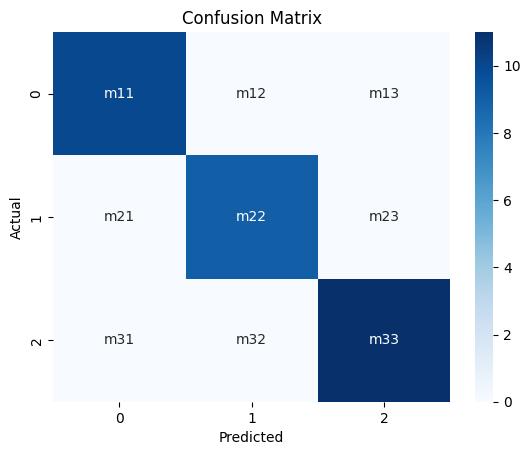

In [ ]:
# LEts create a confusion matrix with heatmap with like the one we illustrated earlier in a table
labels = [['m11', 'm12', 'm13'],
          ['m21', 'm22', 'm23'],
          ['m31', 'm32', 'm33']]

# Create the heatmap
sns.heatmap(cm, annot=np.array(labels), fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

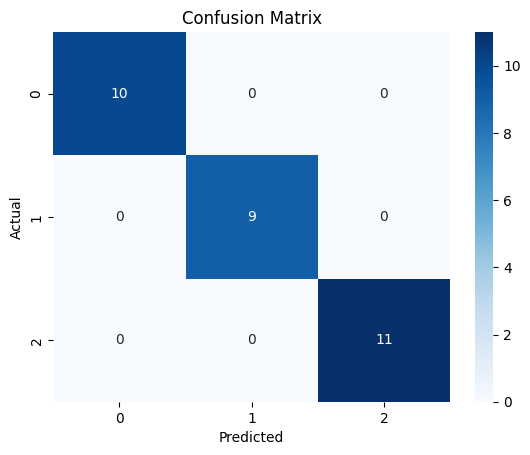

In [ ]:
#confusion matrix to show its values

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Lets define a function that will calculate True positive, False Positive, True Negative,and False Negative for each class

In [ ]:
def calculate_metrics(cm, target_class):
    TP = cm[target_class, target_class]
    FP = cm[:, target_class].sum() - TP
    FN = cm[target_class, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    return TP, FP, TN, FN

######**. Sensitivity**

Sensitivity quantifies how effectively a model detects the positive instances of a particular class. In other words, it answers the question: "Of all the actual positive cases, how many did the model correctly predict as positive?"



Formula:
For a given class, sensitivity (or recall) is defined as:

`Sensitivity = True Positives(TP)/(True Positives(TP) + FalseNegatives(FN))`


A high sensitivity means that the model is good at capturing most of the positive cases. Conversely, a low sensitivity indicates that many positive cases are being missed (i.e., high false negatives).

**Why is the Sensitivity an important metrics**

1. For medical diagnosis - missing a positive case (such as a disease) can have severe consequences. High sensitivity is crucial to ensure that nearly all patients who have the condition are correctly identified.

2. For fraud Detection:
When detecting fraudulent transactions, it is often more important to catch as many fraudulent cases as possible, even if it means having a few false alarms. High sensitivity helps in identifying most fraud cases.

3. For security Systems:
In intrusion detection systems, high sensitivity ensures that most intrusions are detected, minimizing the risk of undetected breaches.

4. For quality Control:
In manufacturing, sensitivity can help in catching defective products. Missing a defect could lead to significant downstream costs or safety issues.

In [ ]:
# LEts calculate sensitivity

# Get unique class labels
class_labels = np.unique(Actual_y)

# Calculate and print metrics (including sensitivity) for each class
for label in class_labels:
    target_class = np.where(class_labels == label)[0][0]  # get index of the target class
    TP, FP, TN, FN = calculate_metrics(cm, target_class)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    print(f"Metrics for class {label}:")
    print(f"  True Positives (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  True Negatives (TN): {TN}")
    print(f"  False Negatives (FN): {FN}")
    print(f"  **Sensitivity**: {sensitivity:.2f}")
    print("-" * 20)

Metrics for class setosa:
  True Positives (TP): 10
  False Positives (FP): 0
  True Negatives (TN): 20
  False Negatives (FN): 0
  **Sensitivity**: 1.00
--------------------
Metrics for class versicolor:
  True Positives (TP): 9
  False Positives (FP): 0
  True Negatives (TN): 21
  False Negatives (FN): 0
  **Sensitivity**: 1.00
--------------------
Metrics for class virginica:
  True Positives (TP): 11
  False Positives (FP): 0
  True Negatives (TN): 19
  False Negatives (FN): 0
  **Sensitivity**: 1.00
--------------------


######**. Specificity**

Specificity, also known as the true negative rate (TNR), measures the proportion of actual negative cases that are correctly identified by a classifier. In other words, it tells us how well the model is at avoiding false alarms. High specificity is important because it minimizes false positives, which is critical in applications where a false alarm can lead to significant consequences or costs.

For a specific class, specificity is calculated as:

`Specificity
= True Negatives(TN)/(True Negatives(TN) + False Positives(FP)`)

This is like the opposite of sensitivity, it is useful;
1. For medical diagnostics - It ensure healthy patients are not wrongly diagnosed with a disease. This will help to minimizes unnecessary treatments or invasive follow-up tests.
2. For fraud detection - To prevent legitimate transactions from being flagged as fraudulent. This will help reduce customer frustration and avoids unnecessary account freezing or investigations.

3. For quality control in Manufacturing- It will help to correctly identify non-defective products. This will help to avoid rejection of  good products, saving costs and reducing waste.


4. For security systems (Intrusion Detection) - It helps to differentiate between actual threats and benign activity.This will help to  minimize false alarms, reducing alert fatigue and unnecessary interventions.



In [ ]:
# Let's calculate specificity

# Get unique class labels
class_labels = np.unique(Actual_y)

# Calculate and print metrics (including specificity) for each class
for label in class_labels:
    target_class = np.where(class_labels == label)[0][0]  # get index of the target class
    TP, FP, TN, FN = calculate_metrics(cm, target_class)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    print(f"Metrics for class {label}:")
    print(f"  True Positives (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  True Negatives (TN): {TN}")
    print(f"  False Negatives (FN): {FN}")
    print(f"  **Specificity**: {specificity:.2f}")
    print("-" * 20)

Metrics for class setosa:
  True Positives (TP): 10
  False Positives (FP): 0
  True Negatives (TN): 20
  False Negatives (FN): 0
  **Specificity**: 1.00
--------------------
Metrics for class versicolor:
  True Positives (TP): 9
  False Positives (FP): 0
  True Negatives (TN): 21
  False Negatives (FN): 0
  **Specificity**: 1.00
--------------------
Metrics for class virginica:
  True Positives (TP): 11
  False Positives (FP): 0
  True Negatives (TN): 19
  False Negatives (FN): 0
  **Specificity**: 1.00
--------------------


######**. Accuracy**

Accuracy is a fundamental metric used to evaluate the overall performance of a classifier. It measures the proportion of total predictions that the model got right.


It tells you, out of all the predictions your model made, what fraction were correct. Think of it as a simple "score" similar to a test score in school—if you get 90 out of 100 questions right, your accuracy is 90%.

In simple terms, it is the proportion of correct predictions over all predictions. This means if a model correctly predicts many cases, its accuracy will be high. If you like you can call accuracy the percentage of correctness.


**Please note:** While accuracy is intuitive, it does not always tell the whole story—especially in cases where some classes are much more common than others (imbalanced datasets). In those cases, even a model with high accuracy might be failing to correctly predict the minority class. That is why it is often used alongside other metrics like sensitivity, specificity, and precision.

`Accuracy= True Positives(TP) + True Negative(TN)/ Total Predictions(TP + TN + FP + FN)
`


`Accuracy = Number of Correct Predictions/Total Number of Predictions
`

 It is useful;

 1. For balanced Datasets -  When the classes are evenly represented. Accuracy gives a reliable measure of performance since each class contributes equally.

2. When you need a quick, overall snapshot of how well a model is performing. It provides a single metric to compare different models or configurations.

3. In systems where the cost of misclassification is similar for all classes. Accuracy is often sufficient when the impact of false positives and false negatives is balanced.

In [ ]:
#Lets calculate overall accuracy using another method from our confusion matrix- matrix trace method

# Accuracy = Sum of Diagonal Elements / Total Sum of the Matrix

accuracy = np.trace(cm) / np.sum(cm)
print(f"Overall Accuracy: {accuracy:.2f}")

Overall Accuracy: 1.00


In [ ]:
# LEts use the other method for the sake of consistency

# Get unique class labels
class_labels = np.unique(Actual_y)

total_correct = 0

# Iterate over each class to sum up the true positives (TP)
for label in class_labels:
    target_class = np.where(class_labels == label)[0][0]  # get index of the target class
    TP, FP, TN, FN = calculate_metrics(cm, target_class)
    total_correct += TP
    print(f"Metrics for class {label}:")
    print(f"  True Positives (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  True Negatives (TN): {TN}")
    print(f"  False Negatives (FN): {FN}")
    print("-" * 20)

# Calculate total number of predictions from the confusion matrix
total_predictions = np.sum(cm)

# Compute overall accuracy
accuracy = total_correct / total_predictions
print(f"Overall Accuracy: {accuracy:.2f}")


Metrics for class setosa:
  True Positives (TP): 10
  False Positives (FP): 0
  True Negatives (TN): 20
  False Negatives (FN): 0
--------------------
Metrics for class versicolor:
  True Positives (TP): 9
  False Positives (FP): 0
  True Negatives (TN): 21
  False Negatives (FN): 0
--------------------
Metrics for class virginica:
  True Positives (TP): 11
  False Positives (FP): 0
  True Negatives (TN): 19
  False Negatives (FN): 0
--------------------
Overall Accuracy: 1.00


######**. Precision**

Precision is the metric that measures the proportion of positive predictions that are actually correct. In simple terms, it tells you how many of the instances labeled as positive by your model truly belong to the positive class. That is, how precise is the model when it comes to predicting the positive classes

**Formula**


For a given class, the formula for precision is:

`Precision = True Positives(TP)/True Positives (TP) + False Positives (FP)`

 Lets imagine precision like this,
 **imagine you are fishing for a specific type of fish.**  
Precision tells you, "Out of all the fish I caught (predicted positives), how many were the fish I was actually aiming for (true positives)?"  
A high precision means that when your model predicts an instance as positive, it is usually correct.  It essentially measures the **purity** of your positive predictions. It helps you understand the accuracy of your models' positive predictions and is critical in applications where the consequences of false positives are severe.


Precision is particularly important in scenarios where the cost of a false positive is high, for example;
1. Spam Filtering - You want to ensure that legitimate emails (negatives) are not incorrectly classified as spam (false positives).  High precision minimizes the risk of important emails being lost.
2. Medical Diagnosis - When screening for a disease, a false positive might lead to unnecessary anxiety and further invasive tests.  High precision ensures that only those who are likely to have the condition receive additional testing or treatment.
3. Fraud Detection - In financial systems, flagging a transaction as fraudulent when it is not can inconvenience customers.  High precision reduces the burden of investigating false alarms.

In [ ]:
# Let's calculate precision

# Get unique class labels
class_labels = np.unique(Actual_y)

# Iterate over each class to compute precision
for label in class_labels:
    target_class = np.where(class_labels == label)[0][0]  # Get index of the target class
    TP, FP, TN, FN = calculate_metrics(cm, target_class)

    # Compute precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Print results
    print(f"Metrics for class {label}:")
    print(f"  True Positives (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  True Negatives (TN): {TN}")
    print(f"  False Negatives (FN): {FN}")
    print(f"  **Precision**: {precision:.2f}")
    print("-" * 20)

Metrics for class setosa:
  True Positives (TP): 10
  False Positives (FP): 0
  True Negatives (TN): 20
  False Negatives (FN): 0
  **Precision**: 1.00
--------------------
Metrics for class versicolor:
  True Positives (TP): 9
  False Positives (FP): 0
  True Negatives (TN): 21
  False Negatives (FN): 0
  **Precision**: 1.00
--------------------
Metrics for class virginica:
  True Positives (TP): 11
  False Positives (FP): 0
  True Negatives (TN): 19
  False Negatives (FN): 0
  **Precision**: 1.00
--------------------


######**. F1 Score**

**Formula**

`F1 = 2 * (Precision * Recall(sensitivity) / (Precision + Recall(Sensitivity)
`



The F1-score is the harmonic mean of precision and recall (sensitivity). It balances both metrics, making it useful when there is an imbalance between False Positives (FP) and False Negatives (FN).


Lets imagine you are a security guard using face recognition software to detect intruders in a restricted area:

Precision focus - The system flags only actual intruders, even if it misses some.
Recall focus - The system flags every suspicious person, even if it includes some false alarms.

F1-score focus - The system finds a balance between the two. If precision is high but recall is low, you may miss intruders. If recall is high but precision is low, you may cause unnecessary panic. F1-score ensures a trade-off, making it especially useful when False Positives and False Negatives both matter.


For examples;
1. Medical diagnosis, lets say for cancer detection. A doctor doesnt want to miss reall cases(low recall) or falsely diagnosehealthy people(low precision). F1-score will ensure a balance between both concerns.

2. For spam detection, spam filter should catch real spam(high recall) but not block important mails(high precsion). So F1-score hwelps to optmize the tradeoffs.

3. A model detecting pedestrians in self-driving cars should detect all pedestrians(high recall) but not falsely identify street signs as people(high precision)

In [ ]:
# Let's calculate F1-score

# Get unique class labels
class_labels = np.unique(Actual_y)

# Iterate over each class to compute F1-score
for label in class_labels:
    target_class = np.where(class_labels == label)[0][0]  # Get index of the target class
    TP, FP, TN, FN = calculate_metrics(cm, target_class)

    # Compute precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Compute recall (sensitivity)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Compute F1-score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Print results
    print(f"Metrics for class {label}:")
    print(f"  True Positives (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  True Negatives (TN): {TN}")
    print(f"  False Negatives (FN): {FN}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall (Sensitivity): {recall:.3f}")
    print(f"  **F1-Score**: {f1_score:.3f}")
    print("-" * 20)


Metrics for class setosa:
  True Positives (TP): 10
  False Positives (FP): 0
  True Negatives (TN): 20
  False Negatives (FN): 0
  Precision: 1.000
  Recall (Sensitivity): 1.000
  **F1-Score**: 1.000
--------------------
Metrics for class versicolor:
  True Positives (TP): 9
  False Positives (FP): 0
  True Negatives (TN): 21
  False Negatives (FN): 0
  Precision: 1.000
  Recall (Sensitivity): 1.000
  **F1-Score**: 1.000
--------------------
Metrics for class virginica:
  True Positives (TP): 11
  False Positives (FP): 0
  True Negatives (TN): 19
  False Negatives (FN): 0
  Precision: 1.000
  Recall (Sensitivity): 1.000
  **F1-Score**: 1.000
--------------------


######**. Metric Report Summary**

All the score for our metrics(Accuracy, Precision, Recall, Specificity, and F1-score) are 1.00, it means our model has achieved **perfect classification** on the Iris dataset.
But **Please note**, this is rare in real-world scenarios unless the dataset is small and well-separated just like the dataset we used.

Let's interpret what this implies for each metric:
Also, note that I am not limiting the interpretation of the result to our dataset...as I could refer to crime, diagnoses and other applicable scenarios.

1. `Recall (Sensitivity) = 1.00 (for all classes)`

Meaning the model correctly identified all actual instances of each class. There were no false negatives (FN), meaning no instance was missed. This is crucial when false negatives are costly (e.g., failing to detect a fraudulent transaction).


2. `Specificity = 1.00 (for all classes)`

The model correctly classified all non-class X instances as not X. There were no false positives (FP), meaning the model never wrongly classified another class as the target class. This is crucial in medical tests where you don’t want to falsely diagnose a healthy person.

3. `Accuracy = 1.00`


Our model correctly classified all samples in the dataset. There are no false positives (FP) or false negatives (FN)—every prediction was correct.



4. `Precision = 1.00 (for all classes)`

Every instance our model predicted as class X was actually class X.
There were no false positives (FP), meaning the model never mistakenly classified an instance as a class when it shouldn't have.
High precision is crucial when false positives are costly (e.g., predicting a patient has cancer when they don’t).





5. `F1-Score = 1.00 (for all classes)`

Since Precision = 1.00 and Recall = 1.00, the F1-score also equals 1.00.
Our model perfectly balances precision and recall, meaning it makes zero mistakes. The F1-score is especially useful when dealing with imbalanced datasets, but in this case, it's redundant because everything is perfect.



######**. Hands On Practice**

Note:
This dataset was generated synthetically [here](https://colab.research.google.com/drive/1YEYsZqRFHsuntcJYQ5PxFM-36Oth2nUG#scrollTo=bu4IG4eTfr8v) and it has never been used to build a model before.


1. Download this [dataset](https://github.com/ek-chris/Practice_datasets/blob/main/performance.csv) or load it directly from here by [copying this link](https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/performance.csv)

2. Use multiple classifier algorithms to build a models  to predict students' performance based on the factors highlighted(features).
3. Pick any model from your trained model, evaluate that model.
4. Interprete your results.

**Hints**


* _Capture all of your codes in functions_

* _check the [ml_pipeline notebook](https://colab.research.google.com/drive/1i91Tcg3Bsy7WN4xamuYJoQhxv6I453w4) for additional help on how structure your work_

#####**. Area Under the Receiver Operating Characteristic Curve**

AUC-ROC is a metric used to evaluate the performance of a binary classification model. It provides insight into how well the model distinguishes between two classes—typically labeled as "positive" and "negative".
ROC Curve is graphical representation that shows the trade-off between sensitivity (True Positive Rate) and specificity (1 - False Positive Rate) at various thresholds. The area under the ROC curve that quantifies the overall ability of the model to discriminate between the two classes.

The ROC curve shows how the model performs as you vary the decision threshold (the cutoff probability to classify an instance as positive or negative).

True Positive Rate (TPR) - The percentage of actual positives that are correctly identified by the model.

False Positive Rate (FPR) - The percentage of actual negatives that are incorrectly classified as positives.
**As the threshold changes, TPR and FPR change, and the ROC curve is plotted by calculating TPR against FPR at different threshold levels**.

The AUC is the area under this ROC curve, providing an aggregate measure of the model’s performance across all thresholds. The higher the AUC, the better the model.

Formula:
True Positive Rate (TPR) or Sensitivity:
TPR = TP/ TP + FN


False Positive Rate (FPR)
FPR = FP / FP + TN

The area under the ROC curve is calculated by integrating the area between the ROC curve and the FPR axis. The formula for AUC is generally computed using numerical methods, like the trapezoidal rule.

* AUC = 0.5 - The model performs no better than random guessing, meaning the classifier cannot distinguish between positive and negative classes.
* 0.5 < AUC < 0.7 - The model has weak discriminatory power.
* 0.7 < AUC < 0.8 -  The model has fair discriminatory power.
* 0.8 < AUC < 0.9 -  The model has good discriminatory power.
* AUC > 0.9 - The model has excellent discriminatory power.

**Why AUC-ROC is Useful**
1. It evaluates the model performance across all possible thresholds.
2. Unlike accuracy, AUC-ROC considers both the positive and negative classes, making it less sensitive to the class distribution that is, its robust to imbalanced dataset.
3. It provides a comprehensive understanding of the model's performance, especially in cases where a balance between sensitivity and specificity is needed.

**When to Use AUC-ROC**
1. When you're dealing with binary classification problems and want to assess model performance across a range of decision thresholds.

2. When you need to evaluate the performance of models where class imbalance is present (e.g., predicting rare events).

To practice AUC-ROC, lets generate a synthetic customer churn dataset, build a model using "Random Forest Algorithm" and then calculate and create the plot for AUC-ROC.

In [44]:
# Import all  the neccessary libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

# Step 1: Generate the synthetic customer churn dataset
np.random.seed(234)

n_samples = 1000
age = np.random.randint(18, 70, n_samples)  # Random age between 18 and 70
tenure = np.random.randint(1, 60, n_samples)  # Random tenure between 1 and 60 months
monthly_spend = np.random.uniform(10, 500, n_samples)  # Random monthly spend between $10 and $500
service_type = np.random.choice(['Basic', 'Premium'], size=n_samples)  # Random service type
churned = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Churn (30% churn rate)

# Create the DataFrame
df = pd.DataFrame({
    'Age': age,
    'Tenure': tenure,
    'Monthly Spend': monthly_spend,
    'Service Type': service_type,
    'Churned': churned
})

In [45]:
df.head()

,Age,Tenure,Monthly Spend,Service Type,Churned
0,26,12,413.80,Basic,0
1,49,10,428.99,Premium,0
2,22,30,366.43,Premium,0
3,49,20,190.78,Premium,0
4,51,25,108.92,Basic,1


In [46]:
df.columns

Index(['Age', 'Tenure', 'Monthly Spend', 'Service Type', 'Churned'], dtype='object')

In [47]:
df.Churned.value_counts()

,count
Churned,
0,708
1,292


In [55]:
# Step 2: Preprocess the data
# Convert 'Service Type' (categorical) to numeric using LabelEncoder
le = LabelEncoder()
df['Service Type'] = le.fit_transform(df['Service Type'])

# Split the data into features (X) and target (y)
X = df.drop('Churned', axis=1)
y = df['Churned']

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=234)

# Step 4: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=234)
rf_classifier.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.6433333333333333
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       206
           1       0.22      0.05      0.09        94

    accuracy                           0.64       300
   macro avg       0.45      0.48      0.43       300
weighted avg       0.53      0.64      0.56       300



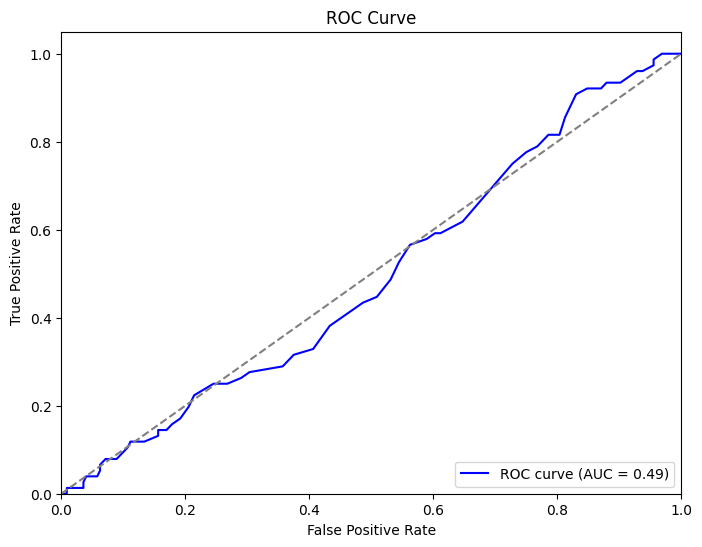

In [43]:
# Lets calculate AUC-ROC
# Step 1: Get the predicted probabilities
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 3: Calculate AUC
roc_auc = auc(fpr, tpr)

# Step 4: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


AUC < 0.5: The model is performing poorly, making incorrect predictions more often than random chance. In this case, it's effectively behaving like an inverted or reversed model (e.g., it is classifying negative instances as positive and vice versa).

We have this low score of 0.49 probably because the dataset has a significant class imbalance , the classifier might have predict the majority class most of the time, resulting in poor AUC.
To fix this, we would use techniques like SMOTE (Synthetic Minority Over-sampling Technique), undersampling, or class weights to address class imbalance.

(https://github.com/ek-chris/Practice_datasets/blob/main/medical_condition.csv)

#####**. Class Imbalance**

In [48]:
df.Churned.value_counts()

,count
Churned,
0,708
1,292


The output of the code above showed a serious class imbalance.
The class distribution of the target variable Churned has 708 instances of class 0 (non-churned customers), which is the majority class and 292 instances of class 1 (churned customers), which is the minority class.
This means that around 71.5% of the samples belong to the majority class (0), and about 28.5% belong to the minority class (1).

Why does this Matters?
Class imbalance can significantly affect the performance of a model, especially when using metrics like accuracy. The model may be biased toward predicting the majority class (0) since it will achieve a high accuracy by simply predicting the majority class most of the time, leading to poor performance on the minority class (1), which is typically the more important class to predict in scenarios like churn detection.

####**. Handling Clas Imbalance**

**. Resampling Techniques:**

* Oversampling the minority class (churned customers) using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or random oversampling.
* Undersampling the majority class (non-churned customers) to reduce its representation in the dataset.


**. Class Weights Adjustment:**

* Many classifiers, including Random Forest, support adjusting class weights to penalize incorrect predictions on the minority class more heavily. This can help the model learn to focus on predicting the minority class better.

**. Anomaly Detection:**

* If the imbalance is extreme, you might treat the minority class as an anomaly detection problem rather than a typical classification problem.

**. Synthetic Minority Over-sampling Technique(SMOTE)**

To address the class imbalance using SMOTE, we can oversample the minority class by generating synthetic samples. SMOTE creates new examples by interpolating between existing minority class instances, which helps balance the class distribution and can improve model performance.

In [50]:
 %%capture
 !pip install imbalanced-learn

In [56]:
# import the imbalanced learn library
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [52]:
df.head()

,Age,Tenure,Monthly Spend,Service Type,Churned
0,26,12,413.80,Basic,0
1,49,10,428.99,Premium,0
2,22,30,366.43,Premium,0
3,49,20,190.78,Premium,0
4,51,25,108.92,Basic,1


In [54]:
le = LabelEncoder()
df['Service Type'] = le.fit_transform(df['Service Type'])

# Step 1: Split the data into features (X) and target (y)
X = df.drop('Churned', axis=1)
y = df['Churned']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Train a Random Forest classifier on the balanced dataset
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# Step 5: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.5766666666666667,
 '              precision    recall  f1-score   support\n\n           0       0.73      0.68      0.71       224\n           1       0.23      0.28      0.25        76\n\n    accuracy                           0.58       300\n   macro avg       0.48      0.48      0.48       300\nweighted avg       0.61      0.58      0.59       300\n')

In [57]:

le = LabelEncoder()
df['Service Type'] = le.fit_transform(df['Service Type'])

# Step 1: Split the data into features (X) and target (y)
X = df.drop('Churned', axis=1)
y = df['Churned']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Undersample the majority class (non-churned customers)
X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]

X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]

# Downsample the majority class to match the minority class size
X_train_majority_undersampled, y_train_majority_undersampled = resample(X_train_majority, y_train_majority,
                                                                      replace=False, n_samples=len(X_train_minority), random_state=42)

# Combine the undersampled majority class with the minority class
X_train_undersampled = pd.concat([X_train_majority_undersampled, X_train_minority])
y_train_undersampled = pd.concat([y_train_majority_undersampled, y_train_minority])

# Step 4: Train the Random Forest classifier on the undersampled dataset
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_undersampled, y_train_undersampled)

# Step 5: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.46,
 '              precision    recall  f1-score   support\n\n           0       0.72      0.45      0.55       224\n           1       0.23      0.50      0.32        76\n\n    accuracy                           0.46       300\n   macro avg       0.48      0.47      0.44       300\nweighted avg       0.60      0.46      0.49       300\n')

accuracy: 0.643

oversampling_accuracy: 0.576


undersampling_accuracy: 0.46